In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('universal_top_spotify_songs.csv')

In [3]:
df = df[df['snapshot_date'] == '2025-06-11']

In [12]:
df_ = df[df['country'].isin(['US', 'KR', 'JP'])]

In [13]:
df.isnull().sum()

spotify_id            0
name                  0
artists               0
daily_rank            0
daily_movement        0
weekly_movement       0
country               0
snapshot_date         0
popularity            0
is_explicit           0
duration_ms           0
album_name            0
album_release_date    0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
dtype: int64

In [14]:
num_cols = ['danceability','energy','loudness','speechiness','acousticness',
            'instrumentalness','liveness','valence','tempo','popularity']
num_cols = [c for c in num_cols if c in df.columns]

print("사용 가능한 수치형 변수:", num_cols)

사용 가능한 수치형 변수: ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'popularity']


In [15]:
from imblearn.over_sampling import SMOTE

X = df_[num_cols]
y = df_['country']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

smote = SMOTE(random_state = 0)
X_train_, y_train_ = smote.fit_resample(X_train, y_train)

model = DecisionTreeClassifier(max_depth = 6, random_state = 0)
model.fit(X_train_, y_train_)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [16]:
y_pred = model.predict(X_test)
print('정확도: ', accuracy_score(y_test, y_pred))

정확도:  0.5333333333333333


In [17]:
train_scores, test_scores = list(), list()

for i in range(1, 20):
    DT1 = DecisionTreeClassifier(max_depth=i, random_state=0)
    DT1.fit(X_train_, y_train_)  

    train_att = DT1.predict(X_train_)
    train_acc = accuracy_score(y_train_, train_att)
    train_scores.append(train_acc)

    test_att = DT1.predict(X_test)
    test_acc = accuracy_score(y_test, test_att)
    test_scores.append(test_acc)

    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.629, test: 0.622
>2, train: 0.705, test: 0.689
>3, train: 0.752, test: 0.578
>4, train: 0.857, test: 0.622
>5, train: 0.914, test: 0.578
>6, train: 0.962, test: 0.533
>7, train: 0.962, test: 0.533
>8, train: 0.971, test: 0.533
>9, train: 0.971, test: 0.533
>10, train: 0.971, test: 0.533
>11, train: 0.971, test: 0.533
>12, train: 0.971, test: 0.533
>13, train: 0.971, test: 0.533
>14, train: 0.971, test: 0.533
>15, train: 0.971, test: 0.533
>16, train: 0.971, test: 0.533
>17, train: 0.971, test: 0.533
>18, train: 0.971, test: 0.533
>19, train: 0.971, test: 0.533


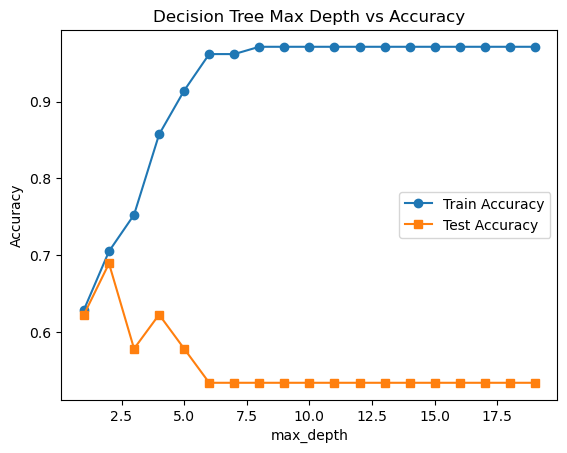

In [18]:
plt.plot(range(1,20), train_scores, marker='o', label='Train Accuracy')
plt.plot(range(1,20), test_scores, marker='s', label='Test Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Max Depth vs Accuracy')
plt.legend()
plt.show()

In [19]:
best_depth = test_scores.index(max(test_scores)) + 1

tree = DecisionTreeClassifier(random_state = 0, max_depth = best_depth)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [20]:
y_pred = tree.predict(X_test)
print('정확도: ', accuracy_score(y_test, y_pred))

정확도:  0.6888888888888889
